In [2]:
import tifffile
import matplotlib.pyplot as plt
import pandas as pd
from aicspylibczi import CziFile
import matplotlib.pyplot as plt
from PIL import Image
from openpiv import tools, preprocess
import czifile
import numpy as np

In [3]:
# Load image
path="/Users/shaotingting/Library/CloudStorage/OneDrive-Personal/tingtingshao/third_semester_ku_leuven/Integrated_bioinformatics_project/peoject_starting_matrial/IBP-starting-data/ablations_data"
fn=path+"/220830-E6_Out.czi"
czi = CziFile(fn)
image_data= czifile.imread(fn).squeeze()
# image_data = img.squeeze()
channel0_data = image_data[0]  

# Change the shape
new_shape = (107, 512, 512)
imgsC0 = channel0_data.reshape(new_shape)

In [4]:
imgsC0 = imgsC0[:9]

In [5]:
imgsC0[8]

array([[10003, 10003, 10002, ..., 10054, 10090, 10078],
       [10003, 10003, 10002, ..., 10048, 10070, 10051],
       [10002, 10003, 10002, ..., 10041, 10047, 10035],
       ...,
       [10078, 10072, 10038, ..., 10003, 10003, 10005],
       [10088, 10073, 10038, ..., 10002, 10002, 10003],
       [10111, 10078, 10032, ..., 10002, 10002, 10002]], dtype=uint16)

(-0.5, 511.5, 511.5, -0.5)

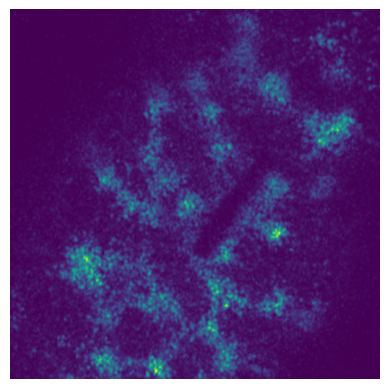

In [6]:
plt.imshow(imgsC0[4])
plt.axis('off')

In [7]:
imgs=tifffile.imread("220830-E6_Out_log.tif")

In [8]:
imgs[0]

array([[26895, 26877, 26852, ..., 25852, 26088, 26423],
       [26938, 26907, 26865, ..., 26401, 26286, 26393],
       [26973, 26930, 26873, ..., 27138, 26646, 26504],
       ...,
       [27529, 27598, 27355, ..., 26839, 26835, 26831],
       [27189, 27141, 26804, ..., 26842, 26840, 26839],
       [26873, 26746, 26358, ..., 26849, 26848, 26848]], dtype=uint16)

(-0.5, 511.5, 511.5, -0.5)

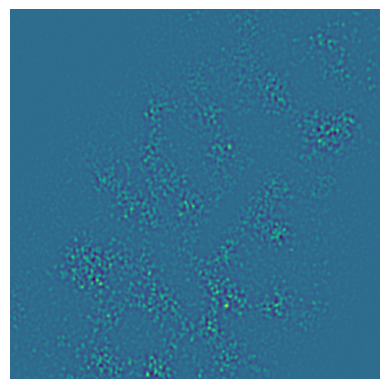

In [9]:
plt.imshow(imgs[4])
plt.axis('off')

(-0.5, 511.5, 551.5, -0.5)

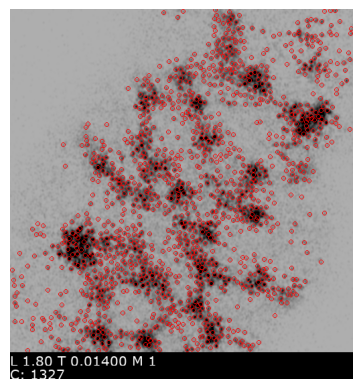

In [10]:
imgs_fit=tifffile.imread("220830-E6_Out_fit.tif")
plt.imshow(imgs_fit[4])
plt.axis('off') # threshold in Gaussian fitting 0.01

(-0.5, 511.5, 511.5, -0.5)

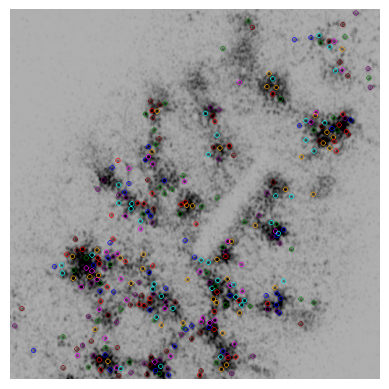

In [11]:
imgs_marked=tifffile.imread("220830-E6_Out_marked.tif")
plt.imshow(imgs_marked[4])
plt.axis('off') # threshold in Gaussian fitting 0.01

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('220830-E6_Out_regression.txt', delim_whitespace=True)

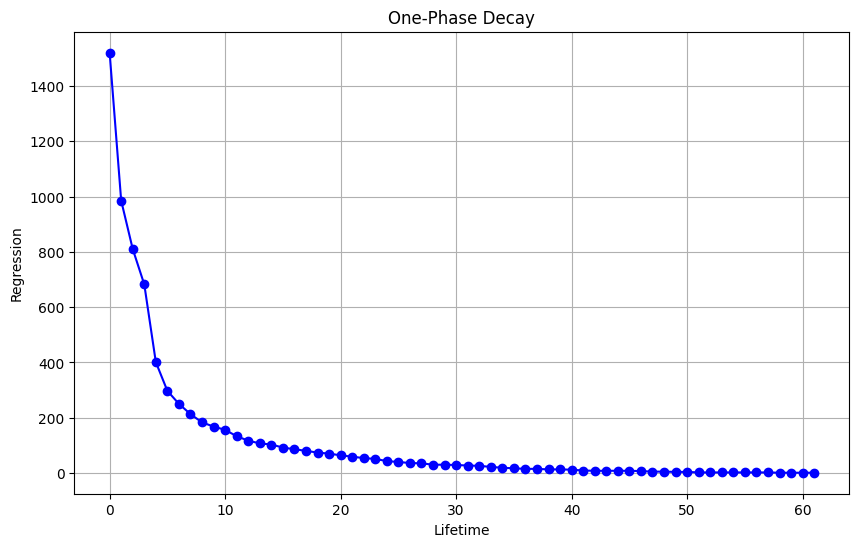

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(data["lifetime"], data["regression"], marker='o', linestyle='-', color='b')
plt.title("One-Phase Decay")
plt.xlabel("Lifetime")
plt.ylabel("Regression")
plt.grid(True)

plt.show()

In [23]:
spot_table = pd.read_csv('220830-E6_Out.txt', comment = '#', sep = '\t')


In [24]:
spot_table = spot_table.sort_values(by = ['total_index', 'plane']).reset_index(drop=True)

In [26]:
spot_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_index  10512 non-null  int64  
 1   plane        10512 non-null  int64  
 2   index        10512 non-null  int64  
 3   x            10512 non-null  float64
 4   y            10512 non-null  float64
 5   diameter     10512 non-null  float64
 6   intensity    10512 non-null  int64  
 7   fit_error    10512 non-null  float64
 8   chi_square   10512 non-null  float64
 9   distance     10512 non-null  float64
 10  life_index   10512 non-null  int64  
 11  life_total   10512 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 985.6 KB


In [31]:
spot_table["plane"].unique

<bound method Series.unique of 0        0
1        1
2        0
3        1
4        2
        ..
10507    8
10508    8
10509    8
10510    8
10511    8
Name: plane, Length: 10512, dtype: int64>

In [18]:
count_at_plane_0 = len(spot_table[spot_table['plane'] == 0])

In [19]:
count_at_plane_0

526

In [20]:
count_at_plane_106 = len(spot_table[spot_table['plane'] == 106])
count_at_plane_106

227

In [21]:
# grouped = spot_table.groupby('plane')

In [22]:
len(spot_table[spot_table['total_index'] == 120])

1